<a href="https://colab.research.google.com/github/Goncharov-IST/Neural_networks/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример 1

**Подключаем библиотеки и дополнителные инструменты**

In [0]:
import numpy as np2 # работа с многомерными массивами
from keras.models import Sequential # последовательная модель  
from keras.layers import Dense # полносвязные слои
from keras.utils import np_utils # дополнительные возможности для работы с массивами
import matplotlib.pyplot as plt # построение графиков
import matplotlib.pylab as pl
from keras import optimizers # функции оптимизаторов
from sklearn import preprocessing

**Задаем входные и выходные значения**

In [0]:
x_train = np2.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np2.array([[0], [0], [0], [1]])

**Создаем последовательную модель с одним нейроном полносвязного слоя, который имеет двухэлементный вход и один выход
Функция активации - relu**

In [4]:
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation="relu"))

Instructions for updating:
Colocations handled automatically by placer.


**Выводим график функции активации relu**

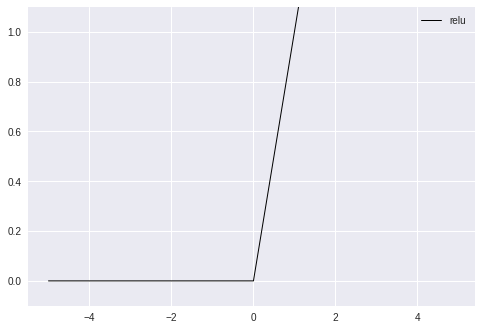

In [5]:
def relu(x):
    return np2.maximum(0, x)
  
x = np2.arange(-5.0, 5.0, 0.1)
y_relu = relu(x)
  
pl.plot(x, y_relu, label='relu', color='k', lw=1, linestyle='-')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

**Компилирем модель с оптимизатором SGD и заданными для него параметрами**

In [6]:
sgd = optimizers.SGD(lr=0.12, decay=1e-6, momentum=0.9, nesterov=True)
#adam = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model1.compile(loss="mean_squared_error", optimizer=sgd, metrics=['accuracy'])
print(model1.summary()) # выводим информация о модели

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


**Симмулируем работу не обученной еще сети**

In [7]:
prediction1 = model1.predict(x_train)
print(prediction1)

[[0.       ]
 [0.       ]
 [1.0269741]
 [0.9999974]]


**Обучаем сеть в течение 20ти эпох**

In [8]:
history = model1.fit(x_train, y_train, epochs=20, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
4/4 [==============================] - 0s 40ms/step - loss: 0.2637 - acc: 0.7500
Epoch 2/20
4/4 [==============================] - 0s 333us/step - loss: 0.1708 - acc: 0.7500
Epoch 3/20
4/4 [==============================] - 0s 380us/step - loss: 0.1272 - acc: 0.7500
Epoch 4/20
4/4 [==============================] - 0s 682us/step - loss: 0.1133 - acc: 0.7500
Epoch 5/20
4/4 [==============================] - 0s 466us/step - loss: 0.0989 - acc: 0.7500
Epoch 6/20
4/4 [==============================] - 0s 890us/step - loss: 0.0743 - acc: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 289us/step - loss: 0.0472 - acc: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 379us/step - loss: 0.0309 - acc: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 676us/step - loss: 0.0276 - acc: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 384us/step - loss: 0.0266 - acc: 1.0000
Epoch 11/20
4/4 [=====

**Определяем точность работы сети**

In [9]:
scores = model1.evaluate(x_train, y_train, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 100.00%


**Выводим графики функции ошибки и аккуратности при обучении сети**

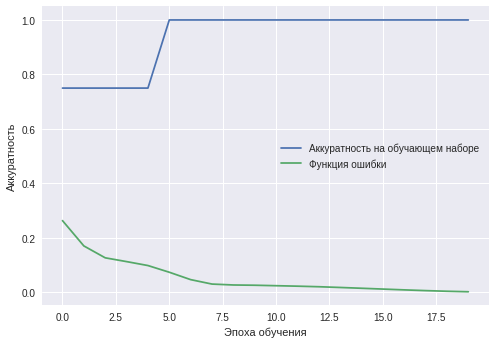

In [10]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['loss'], label='Функция ошибки')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

**Симмулируем работу сети после обучения **

In [11]:
#from sklearn import preprocessing
prediction1 = model1.predict(x_train)
#normalized_pred = preprocessing.normalize(prediction1)
print(prediction1)

[[0.        ]
 [0.06011683]
 [0.        ]
 [0.9559172 ]]


**Ответ отличается от правильного примерно лишь на 0.02**

In [12]:
print(y_train)

[[0]
 [0]
 [0]
 [1]]


# Пример 2

In [0]:
import numpy as np2 # работа с многомерными массивами
from keras.models import Sequential # последовательная модель  
from keras.layers import Dense # полносвязные слои
from keras.utils import np_utils # дополнительные возможности для работы с массивами
import matplotlib.pyplot as plt # построение графиков
import matplotlib.pylab as pl
from keras import optimizers # функции оптимизаторов
from sklearn import preprocessing # нормализация выходных данных

In [0]:
x2_train = np2.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y2_train = np2.array([[0], [1], [1], [1]])

In [0]:
model2 = Sequential()
model2.add(Dense(1, input_dim=2, activation="relu"))

In [0]:
sgd2 = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

model2.compile(loss="mean_squared_error", optimizer=sgd2, metrics=['accuracy'])

In [0]:
prediction2 = model2.predict(x2_train)
print(prediction2)

[[0.        ]
 [0.61915886]
 [0.8542756 ]
 [1.4734344 ]]


In [0]:
history2 = model2.fit(x2_train, y2_train, epochs=20, verbose=1)

Epoch 1/20
4/4 [==============================] - 0s 15ms/step - loss: 0.0976 - acc: 1.0000
Epoch 2/20
4/4 [==============================] - 0s 316us/step - loss: 0.0924 - acc: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 477us/step - loss: 0.0868 - acc: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 254us/step - loss: 0.0812 - acc: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 246us/step - loss: 0.0758 - acc: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 228us/step - loss: 0.0711 - acc: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 231us/step - loss: 0.0675 - acc: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 223us/step - loss: 0.0650 - acc: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 234us/step - loss: 0.0636 - acc: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 1ms/step - loss: 0.0630 - acc: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 762us/step - loss:

In [0]:
scores = model2.evaluate(x2_train, y2_train, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 100.00%


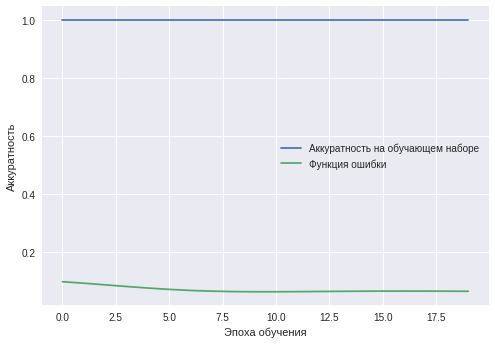

In [0]:
plt.plot(history2.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history2.history['loss'], label='Функция ошибки')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

**Тест**

In [0]:
prediction2 = model2.predict(x2_train)
print(prediction2)

[[0.3180252 ]
 [0.76901984]
 [0.75277877]
 [1.2037734 ]]


**Правильный ответ**

In [0]:
print(y2_train)

[[0]
 [1]
 [1]
 [1]]


# Пример 3

In [0]:
import numpy as np3 # работа с многомерными массивами
from keras.models import Sequential # последовательная модель  
from keras.layers import Dense # полносвязные слои
from keras.utils import np_utils # дополнительные возможности для работы с массивами
import matplotlib.pyplot as plt # построение графиков
import matplotlib.pylab as pl
from keras import optimizers # функции оптимизаторов

In [0]:
x3_train = np3.array([[-0.5, -0.5], [-0.5, 0.5], [0.4, -0.4], [-0.2, 1.0]])
y3_train = np3.array([1, 1, 0, 0])

In [0]:
model3 = Sequential()
model3.add(Dense(1, input_dim=2, activation="relu"))

In [0]:
sgd3 = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#adam3 = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
model3.compile(loss="mean_squared_error", optimizer=sgd3, metrics=['accuracy'])
#print(model1.summary()) # выводим информация о модели

In [0]:
prediction3 = model3.predict(x3_train)
print(prediction3)

[[0.01417798]
 [0.60279995]
 [0.        ]
 [0.71201754]]


In [0]:
history3 = model3.fit(x3_train, y3_train, epochs=20, verbose=1)

Epoch 1/20
4/4 [==============================] - 0s 99ms/step - loss: 0.4091 - acc: 0.5000
Epoch 2/20
4/4 [==============================] - 0s 451us/step - loss: 0.3306 - acc: 0.5000
Epoch 3/20
4/4 [==============================] - 0s 509us/step - loss: 0.2435 - acc: 0.5000
Epoch 4/20
4/4 [==============================] - 0s 303us/step - loss: 0.1637 - acc: 0.7500
Epoch 5/20
4/4 [==============================] - 0s 224us/step - loss: 0.1012 - acc: 0.7500
Epoch 6/20
4/4 [==============================] - 0s 321us/step - loss: 0.0599 - acc: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 245us/step - loss: 0.0413 - acc: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 329us/step - loss: 0.0400 - acc: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 659us/step - loss: 0.0478 - acc: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 264us/step - loss: 0.0577 - acc: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 326us/step - los

In [0]:
scores = model3.evaluate(x3_train, y3_train, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 100.00%


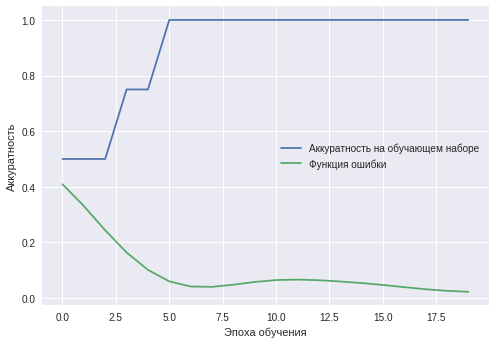

In [0]:
plt.plot(history3.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history3.history['loss'], label='Функция ошибки')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

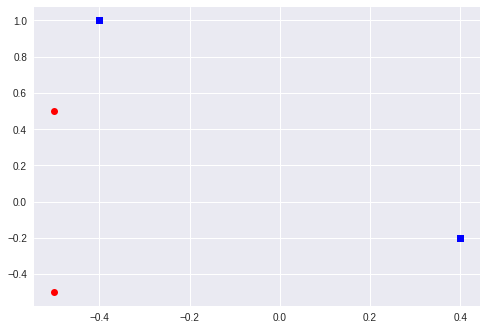

In [0]:
plt.plot([-0.5, -0.5],[-0.5, 0.5], 'ro')
plt.plot([0.4, -0.4], [-0.2, 1.0], 'bs')
plt.show()

# Графики функций

http://deep.uran.ru/wiki/index.php?title=%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D1%8B_%D1%81_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%81%D0%BB%D0%BE%D0%B9%D0%BD%D1%8B%D0%BC_%D0%BF%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD%D0%BE%D0%BC_%D0%B2_Keras

https://neurohive.io/ru/osnovy-data-science/activation-functions/?fbclid=IwAR2KLCrDVHvqcoD2N-ghcodEkNxeSOoGGzB24GcpgR3ueZMbin76y52LS3o

https://schwalbe10.github.io/thinkage/2017/02/12/activation.html

**Softmax**

**Softmax**, **relu**, **sigmoid**

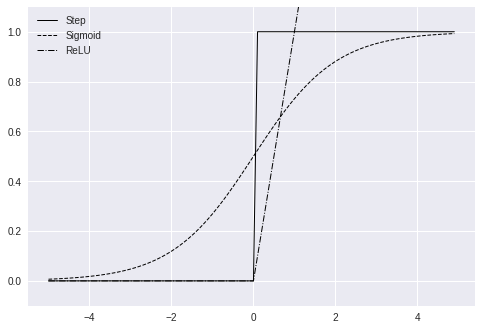

In [0]:
#import numpy as np
#import matplotlib.pylab as plt


def step(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y_step = step(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)

plt.plot(x, y_step, label='Step', color='k', lw=1, linestyle=None)
plt.plot(x, y_sigmoid, label='Sigmoid', color='k', lw=1, ls='--')
plt.plot(x, y_relu, label='ReLU', color='k', lw=1, linestyle='-.')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()